# SynthText Dataset

In [1]:
import sys
sys.path.append('../../')

from dl.data.txtrecog import datasets
from dl.data.txtrecog import transforms, target_transforms
%load_ext autoreload
%autoreload 2

In [2]:
transform = transforms.Compose(
    [transforms.Resize((100, 32)),
     transforms.Grayscale(last_dims=3),
     transforms.ToTensor()]
)
target_transform = target_transforms.Compose(
    [target_transforms.Text2Number(class_labels=datasets.ALPHANUMERIC_WITH_BLANK_LABELS),
     target_transforms.ToTensor()]
)
train_dataset = datasets.SynthTextRecognitionDataset(transform=transform, target_transform=target_transform)


INFO:root:Loading ground truth...
INFO:root:Loaded! 23.361875534057617s


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

from dl.data.utils.converter import tensor2cvrgbimg

tensor([9]) i


<IPython.core.display.Javascript object>


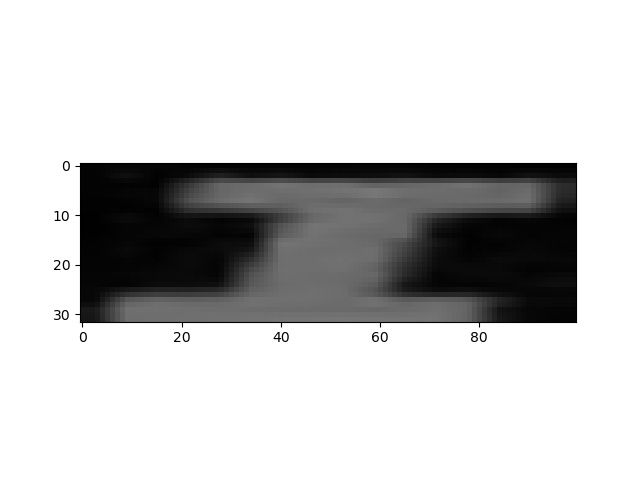

tensor([14, 15, 20]) not


<IPython.core.display.Javascript object>


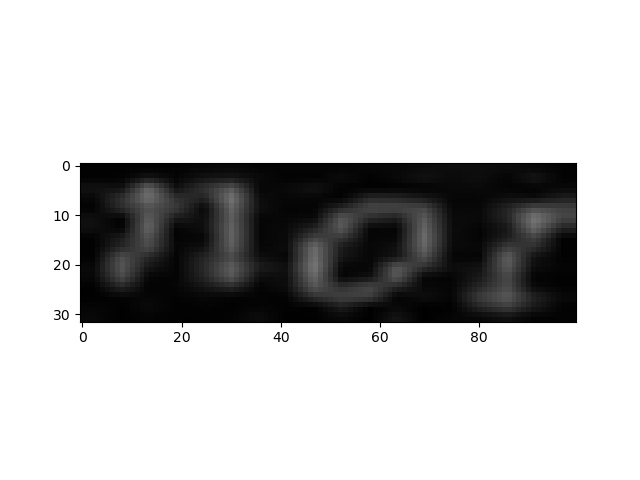

tensor([20,  9, 13,  5]) time


<IPython.core.display.Javascript object>


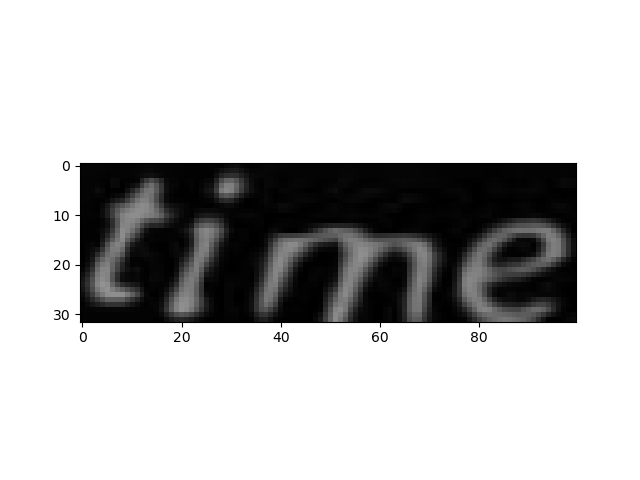

tensor([20,  8,  5, 25]) they


<IPython.core.display.Javascript object>


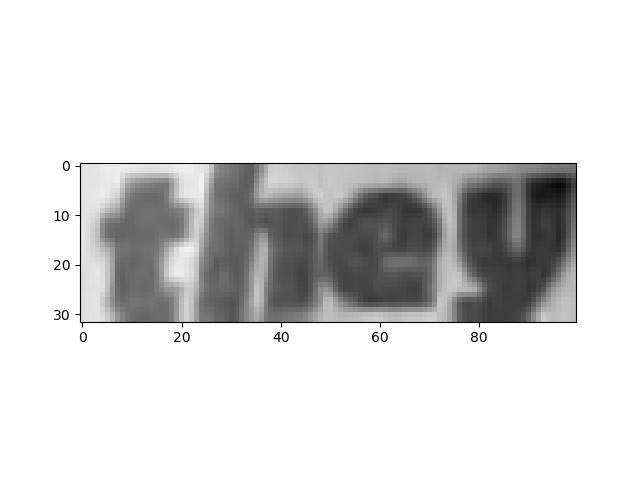

In [4]:
indices = [1, 100, 150, 10000]

for index in indices:
    img, targets = train_dataset[index]

    print(targets, ''.join([datasets.ALPHANUMERIC_WITH_BLANK_LABELS[c.item()] for c in targets]))
    
    img = tensor2cvrgbimg(img)
    
    plt.figure()
    plt.imshow(img)